# The given dataset contains price of second-hand Hyundai grand i10 car with 
# respect to year of making. Find the best linear relationship between year and 
# price. Can you predict the possible price of a 2022 model second-hand grand i10?

In [166]:
import pandas as pd
import numpy as np

In [167]:
data = pd.read_csv('car_age_price.csv') #reading data

In [168]:
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


<AxesSubplot:title={'center':'Scatter plot of Price vs Year'}, xlabel='Price', ylabel='Year'>

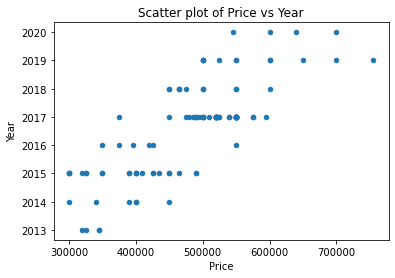

In [169]:
data.plot.scatter(x='Price', y='Year', title = 'Scatter plot of Price vs Year')

In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [171]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [172]:
# Splitting the data
X = data['Year']
y = data['Price']

In [189]:
# converting to model readable format
X = data['Year'].values.reshape(-1,1)
y = data['Price'].values.reshape(-1,1)

In [190]:
# splitting the dataset to train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 

In [175]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [188]:
regressor.fit(X_train, y_train)

LinearRegression()

In [191]:
pred = regressor.predict([[2022]]) 
y_pred = regressor.predict(X_test)
print("prediction for 2022 is", pred) 

prediction for 2022 is [[743601.61594504]]


# Please learn about lasso regression and create a model along with linear
# regression. Find out which one is performing better.

In [178]:
X_test = list(np.concatenate(X_test).flat)
X_test

[2019,
 2017,
 2018,
 2018,
 2018,
 2015,
 2017,
 2018,
 2019,
 2019,
 2013,
 2017,
 2015,
 2020,
 2018,
 2019,
 2013,
 2015,
 2017,
 2017,
 2017,
 2017,
 2017]

In [179]:
y_test = list(np.concatenate(y_test).flat)
y_test

[525000,
 495000,
 465000,
 450000,
 550000,
 300000,
 550000,
 500000,
 500000,
 550000,
 320000,
 550000,
 465000,
 640000,
 465000,
 500000,
 345000,
 390000,
 375000,
 520000,
 550000,
 500000,
 550000]

In [180]:
y_pred = list(np.concatenate(y_pred).flat)
y_pred

[600775.912520811,
 505558.7769046575,
 553167.3447127342,
 553167.3447127342,
 553167.3447127342,
 410341.641288504,
 505558.7769046575,
 553167.3447127342,
 600775.912520811,
 600775.912520811,
 315124.5056723505,
 505558.7769046575,
 410341.641288504,
 648384.4803288877,
 553167.3447127342,
 600775.912520811,
 315124.5056723505,
 410341.641288504,
 505558.7769046575,
 505558.7769046575,
 505558.7769046575,
 505558.7769046575,
 505558.7769046575]

In [181]:
data_new = pd.DataFrame({"Years": X_test, "Price": y_test, "Predicted": y_pred})
data_new

,Years,Price,Predicted
0,2019,525000,600775.912521
1,2017,495000,505558.776905
2,2018,465000,553167.344713
3,2018,450000,553167.344713
4,2018,550000,553167.344713
5,2015,300000,410341.641289
6,2017,550000,505558.776905
7,2018,500000,553167.344713
8,2019,500000,600775.912521
9,2019,550000,600775.912521


In [182]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("The MSE for this model predictions is", mse)

The MSE for this model predictions is 4326906256.829671


In [183]:
#rmse
print("RMSE is",np.sqrt(mse))

RMSE is 65779.22359552195


In [202]:
from sklearn.linear_model import Lasso
reg = Lasso(alpha=1)
reg.fit(X_train, y_train)

Lasso(alpha=1)

In [203]:
y_predd = reg.predict(X_test)

In [205]:
mse = mean_squared_error(y_test, y_predd)
print("The MSE for this model predictions is", mse)

The MSE for this model predictions is 4326859771.015669


In [206]:
#rmse
print("RMSE is",np.sqrt(mse))

RMSE is 65778.8702473345
